# Trabajos y salarios en ciencia de datos 

El dataframe que contiene información sobre trabajos y salarios en Ciencia de Datos abarca el período de 2021 a 2023, con un total de 9,355 registros. Cada registro proporciona detalles valiosos sobre diversos aspectos relacionados con la compensación en el campo de datos. La columna "work_year" especifica el año de registro, permitiendo un análisis temporal de las tendencias salariales. La columna "job_title" detalla los roles laborales específicos, como 'Data Scientist' o 'Data Engineer', esencial para entender la distribución salarial entre funciones especializadas. La categorización adicional en "job_category" simplifica el análisis al clasificar los roles en áreas más amplias como 'Data Analysis' o 'Machine Learning'. La moneda en la que se paga el salario se encuentra en la columna "salary_currency", crucial para la conversión y comprensión global del valor salarial. La columna "salary" representa el salario bruto anual en la moneda local, mientras que "salary_in_usd" proporciona una versión uniforme en Dólares Estadounidenses para comparaciones globales. La ubicación del empleado, nivel de experiencia, tipo de empleo, configuración de trabajo, ubicación de la empresa y tamaño de la empresa, detallados en las respectivas columnas, enriquecen aún más el análisis, brindando insights sobre las diferencias geográficas, niveles de experiencia, tipos de empleo y entornos laborales que afectan las estructuras salariales en el sector de Ciencia de Datos. Este conjunto de datos proporciona una visión integral para comprender las complejidades y variaciones en los salarios de los profesionales de datos a lo largo del tiempo y en diferentes contextos.

#### Repositorio del dataset

[Kaggle: Jobs and Salaries in Data Science](https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data/data)

In [1]:
# librerias a usar
library("readxl")
library("dplyr")
library("ggplot2")
library("tidyr")
library("corrplot")
library("sf")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
corrplot 0.92 loaded
Warning message:
"package 'sf' was built under R version 3.6.3"Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1


In [2]:
# lectura de datos

df_salaries <- read.csv("jobs_in_data.csv")
head(df_salaries)
summary(df_salaries)

work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Senior,Full-time,Remote,United States,M


   work_year                        job_title   
 Min.   :2020   Data Engineer            :2195  
 1st Qu.:2023   Data Scientist           :1989  
 Median :2023   Data Analyst             :1388  
 Mean   :2023   Machine Learning Engineer: 991  
 3rd Qu.:2023   Applied Scientist        : 272  
 Max.   :2023   Research Scientist       : 269  
                (Other)                  :2251  
                    job_category  salary_currency     salary      
 Data Science and Research:3014   USD    :8591    Min.   : 14000  
 Data Engineering         :2260   GBP    : 347    1st Qu.:105200  
 Data Analysis            :1457   EUR    : 340    Median :143860  
 Machine Learning and AI  :1428   CAD    :  38    Mean   :149928  
 Leadership and Management: 503   AUD    :  11    3rd Qu.:187000  
 BI and Visualization     : 313   PLN    :   7    Max.   :450000  
 (Other)                  : 380   (Other):  21                    
 salary_in_usd         employee_residence    experience_level  employmen

In [3]:
str(df_salaries)

'data.frame':	9355 obs. of  12 variables:
 $ work_year         : int  2023 2023 2023 2023 2023 2023 2023 2023 2023 2023 ...
 $ job_title         : Factor w/ 125 levels "AI Architect",..: 44 42 42 70 70 70 70 101 101 45 ...
 $ job_category      : Factor w/ 10 levels "BI and Visualization",..: 5 4 4 8 8 8 8 10 10 5 ...
 $ salary_currency   : Factor w/ 11 levels "AUD","BRL","CAD",..: 6 11 11 11 11 11 11 11 11 11 ...
 $ salary            : int  88000 186000 81800 212000 93300 130000 100000 224400 138700 210000 ...
 $ salary_in_usd     : int  95012 186000 81800 212000 93300 130000 100000 224400 138700 210000 ...
 $ employee_residence: Factor w/ 83 levels "Algeria","American Samoa",..: 30 81 81 81 81 81 81 81 81 81 ...
 $ experience_level  : Factor w/ 4 levels "Entry-level",..: 3 4 4 4 4 4 4 3 3 2 ...
 $ employment_type   : Factor w/ 4 levels "Contract","Freelance",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ work_setting      : Factor w/ 3 levels "Hybrid","In-person",..: 1 2 2 2 2 3 3 2 2 3 ...
 $ compan

In [4]:
## valores faltantes
sum(is.na(df_salaries))

[1] 0

In [5]:
### ver valores unicos de algunas columnas
columns <- c("work_year","job_category", "salary_currency", "employee_residence", "experience_level", "company_location","company_size")
valores_unicos <- lapply(df_salaries[columns], unique)
valores_unicos

$work_year
[1] 2023 2022 2020 2021

$job_category
 [1] Data Engineering               Data Architecture and Modeling
 [3] Data Science and Research      Machine Learning and AI       
 [5] Data Analysis                  Leadership and Management     
 [7] BI and Visualization           Data Quality and Operations   
 [9] Data Management and Strategy   Cloud and Database            
10 Levels: BI and Visualization Cloud and Database ... Machine Learning and AI

$salary_currency
 [1] EUR USD GBP CAD AUD PLN BRL TRY CHF SGD DKK
Levels: AUD BRL CAD CHF DKK EUR GBP PLN SGD TRY USD

$employee_residence
 [1] Germany                  United States            United Kingdom          
 [4] Canada                   Spain                    Ireland                 
 [7] South Africa             Poland                   France                  
[10] Czech Republic           Netherlands              Pakistan                
[13] Ukraine                  Lithuania                Portugal                
[16] Australia                Uganda                   Colombia                
[19] Italy                    Slovenia                 Romania                 
[22] Greece                   India                    Latvia                  
[25] Mauritius                Armenia                  Croatia                 
[28] Thailand                 South Korea              Estonia                 
[31] Turkey                   Philippines              Brazil                  
[34] Qatar                    Russia                   Kenya                   
[37] Tunisia                  Ghana                    Belgium                 
[40] Switzerland              Andorra                  Ecuador                 
[43] Peru                     Mexico                   Moldova                 
[46] Nigeria                  Saudi Arabia             Argentina               
[49] Egypt                    Uzbekistan               Georgia                 
[52] Central African Republic Finland                  Austria                 
[55] Singapore                Sweden                   Kuwait                  
[58] Cyprus                   Bosnia and Herzegovina   Iran                    
[61] American Samoa           China                    Costa Rica              
[64] Chile                    Puerto Rico              Denmark                 
[67] Bolivia                  Dominican Republic       Indonesia               
[70] United Arab Emirates     Malaysia                 Japan                   
[73] Honduras                 Algeria                  Vietnam                 
[76] Iraq                     Bulgaria                 Jersey                  
[79] Serbia                   New Zealand              Hong Kong               
[82] Luxembourg               Malta                   
83 Levels: Algeria American Samoa Andorra Argentina Armenia ... Vietnam

$experience_level
[1] Mid-level   Senior      Executive   Entry-level
Levels: Entry-level Executive Mid-level Senior

$company_location
 [1] Germany                  United States            United Kingdom          
 [4] Canada                   Spain                    Ireland                 
 [7] South Africa             Poland                   France                  
[10] Netherlands              Luxembourg               Lithuania               
[13] Portugal                 Gibraltar                Australia               
[16] Colombia                 Ukraine                  Slovenia                
[19] Romania                  Greece                   India                   
[22] Latvia                   Mauritius                Russia                  
[25] Italy                    South Korea              Estonia                 
[28] Czech Republic           Brazil                   Qatar                   
[31] Kenya                    Denmark                  Ghana                   
[34] Sweden                   Turkey                   Switzerland             
[37] Andorra

In [6]:
# value counts
table(df_salaries$work_year)
table(df_salaries$job_category)
table(df_salaries$salary_currency)
table(df_salaries$employee_residence)
table(df_salaries$experience_level)
table(df_salaries$company_location)
table(df_salaries$company_size)
table(df_salaries$work_setting)


2020 2021 2022 2023 
  71  197 1634 7453 


          BI and Visualization             Cloud and Database 
                           313                              5 
                 Data Analysis Data Architecture and Modeling 
                          1457                            259 
              Data Engineering   Data Management and Strategy 
                          2260                             61 
   Data Quality and Operations      Data Science and Research 
                            55                           3014 
     Leadership and Management        Machine Learning and AI 
                           503                           1428 


 AUD  BRL  CAD  CHF  DKK  EUR  GBP  PLN  SGD  TRY  USD 
  11    4   38    5    3  340  347    7    6    3 8591 


                 Algeria           American Samoa                  Andorra 
                       1                        1                        1 
               Argentina                  Armenia                Australia 
                       9                        2                       21 
                 Austria                  Belgium                  Bolivia 
                       6                        6                        2 
  Bosnia and Herzegovina                   Brazil                 Bulgaria 
                       1                       19                        1 
                  Canada Central African Republic                    Chile 
                     224                        2                        1 
                   China                 Colombia               Costa Rica 
                       1                       16                        1 
                 Croatia                   Cyprus           Czech Republic 
           


Entry-level   Executive   Mid-level      Senior 
        496         281        1869        6709 


                 Algeria           American Samoa                  Andorra 
                       1                        1                        1 
               Argentina                  Armenia                Australia 
                       5                        1                       24 
                 Austria                  Bahamas                  Belgium 
                       6                        1                        4 
  Bosnia and Herzegovina                   Brazil                   Canada 
                       1                       17                      226 
Central African Republic                    China                 Colombia 
                       2                        1                       16 
                 Croatia           Czech Republic                  Denmark 
                       3                        3                        5 
                 Ecuador                    Egypt                  Estonia 
           


   L    M    S 
 748 8448  159 


   Hybrid In-person    Remote 
      191      5730      3434 

In [7]:
# filtrar por pais colombia 
df_employye_colombian <- df_salaries %>% filter(employee_residence == "Colombia")
head(df_employye_colombian)
table(df_employye_colombian$experience_level)

work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
2023,Machine Learning Engineer,Machine Learning and AI,USD,90000,90000,Colombia,Senior,Full-time,In-person,Colombia,M
2023,Machine Learning Engineer,Machine Learning and AI,USD,70000,70000,Colombia,Senior,Full-time,In-person,Colombia,M
2023,Data Engineer,Data Engineering,USD,131000,131000,Colombia,Mid-level,Full-time,In-person,Colombia,M
2023,Data Engineer,Data Engineering,USD,88000,88000,Colombia,Mid-level,Full-time,In-person,Colombia,M
2023,Data Engineer,Data Engineering,USD,131000,131000,Colombia,Mid-level,Full-time,In-person,Colombia,M
2023,Data Engineer,Data Engineering,USD,88000,88000,Colombia,Mid-level,Full-time,In-person,Colombia,M



Entry-level   Executive   Mid-level      Senior 
          1           0           6           9 

Tras aplicar un filtro para individuos que son residentes de Colombia en el conjunto de datos, se identificaron aquellos cuyos salarios anuales se encuentran en el rango de $21,844 a $131,000. Al realizar un análisis más detallado de este grupo, se observa que la distribución por niveles de experiencia revela una persona en el nivel de entrada ("Entry-level"), seis en el nivel intermedio ("Mid-level"), y nueve en el nivel senior ("Senior"). Notablemente, no se encontraron individuos en la categoría ejecutiva ("Executive") dentro de este rango salarial específico en el contexto colombiano. 

In [8]:
# filtrar donde el pais del empleado (nacionalidad) y el pais de la empresa sean diferentes
df_residence_location <- df_salaries %>%
  filter(as.character(employee_residence) != as.character(company_location))
head(df_residence_location, 10)
table(df_residence_location$job_category)


work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
2023,AI Engineer,Machine Learning and AI,USD,50000,50000,Czech Republic,Mid-level,Contract,Remote,Canada,L
2023,Data Science Consultant,Data Science and Research,USD,21000,21000,Pakistan,Mid-level,Freelance,Remote,Luxembourg,S
2023,BI Data Analyst,Data Analysis,USD,25000,25000,Ukraine,Entry-level,Full-time,Remote,Netherlands,M
2023,Business Data Analyst,Data Analysis,GBP,65000,79976,Spain,Senior,Full-time,Remote,Gibraltar,L
2023,Machine Learning Engineer,Machine Learning and AI,USD,36000,36000,Uganda,Entry-level,Full-time,Remote,United States,M
2023,Machine Learning Engineer,Machine Learning and AI,EUR,65000,70179,Italy,Senior,Full-time,Remote,United States,L
2023,Machine Learning Engineer,Machine Learning and AI,EUR,45000,48585,Italy,Mid-level,Full-time,Remote,United Kingdom,M
2023,Business Data Analyst,Data Analysis,USD,17000,17000,Armenia,Mid-level,Full-time,Remote,Russia,L
2023,AI Engineer,Machine Learning and AI,USD,35000,35000,Croatia,Entry-level,Full-time,Remote,Germany,M
2023,Machine Learning Operations Engineer,Machine Learning and AI,USD,60000,60000,Thailand,Senior,Full-time,Remote,United States,L



          BI and Visualization             Cloud and Database 
                             2                              0 
                 Data Analysis Data Architecture and Modeling 
                            23                              0 
              Data Engineering   Data Management and Strategy 
                            18                              1 
   Data Quality and Operations      Data Science and Research 
                             0                             33 
     Leadership and Management        Machine Learning and AI 
                             4                             36 

In [9]:
## df_residence_location cuales no son remotos
df_no_remote <- df_salaries %>% filter(work_setting != "Remote")
head(df_no_remote)
table(df_no_remote$job_category)

work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
2023,Machine Learning Researcher,Machine Learning and AI,USD,224400,224400,United States,Mid-level,Full-time,In-person,United States,M



          BI and Visualization             Cloud and Database 
                           227                              0 
                 Data Analysis Data Architecture and Modeling 
                           823                            126 
              Data Engineering   Data Management and Strategy 
                          1437                             37 
   Data Quality and Operations      Data Science and Research 
                            35                           1950 
     Leadership and Management        Machine Learning and AI 
                           327                            959 

De un total de 9355 registros en nuestro conjunto de datos, se ha identificado que 5921 de ellos corresponden a empleos que involucran trabajo remoto. Es interesante destacar que la mayor proporción de trabajo remoto se observa en los campos de Data Science and Research, alcanzando un total de 1950 registros. Le sigue de cerca el área de Data Engineering, que cuenta con 1437 registros de trabajo remoto. Estos hallazgos abarcan el período comprendido entre los años 2020 y 2023, evidenciando la creciente relevancia y adopción del trabajo remoto en sectores especializados como la ciencia de datos y la ingeniería de datos.

In [10]:
# sueldos por job_category con salario medio en dolares con su respectiva desviacion estandar

df_jobs_salaries <- df_salaries %>% 
  group_by(job_category) %>% 
  summarise(
    job_count = n(),  # Número de filas en cada grupo
    mean_salary = mean(salary_in_usd), # Media de salario en cada grupo
    sd_salary = sd(salary_in_usd), # Desviación estándar de salario en cada grupo
    percent_sd = (sd_salary / mean_salary) * 100 # Porcentaje de desviación estándar
  ) %>%
  ungroup() %>%  # Desagrupar para evitar el mensaje de advertencia
  replace_na(list(sd_salary = 0, percent_sd = 0)) %>%  # Reemplazar NA con 0
  mutate(percent_sd = round(percent_sd, 2)) %>%  # Redondear a 2 decimales)
  arrange(desc(mean_salary)) # Ordenar por salario medio de mayor a menor

df_jobs_salaries


job_category,job_count,mean_salary,sd_salary,percent_sd
Machine Learning and AI,1428,178925.8,68748.79,38.42
Data Science and Research,3014,163758.6,63307.72,38.66
Data Architecture and Modeling,259,156002.4,57029.54,36.56
Cloud and Database,5,155000.0,28722.81,18.53
Data Engineering,2260,146197.7,57116.21,39.07
Leadership and Management,503,145476.0,60077.16,41.30
BI and Visualization,313,135092.1,49280.69,36.48
Data Analysis,1457,108505.7,43873.08,40.43
Data Management and Strategy,61,103139.9,44017.58,42.68
Data Quality and Operations,55,100879.5,53238.03,52.77


La categoría 'Machine Learning and AI' cuenta con 1428 empleos, con un salario promedio de $178,925.8 y una desviación estándar del salario del 38.42%. De manera similar, 'Data Science and Research' registra 3014 trabajos, con un salario promedio de $163,758.6 y una desviación estándar del salario del 38.66%.

Otras categorías incluyen 'Data Architecture and Modeling' con 259 empleos, 'Cloud and Database' con 5 empleos, 'Data Engineering' con 2260 empleos, 'Leadership and Management' con 503 empleos, 'BI and Visualization' con 313 empleos, 'Data Analysis' con 1457 empleos, 'Data Management and Strategy' con 61 empleos, y 'Data Quality and Operations' con 55 empleos.

Es importante notar que los valores de desviación estándar no están segmentados por experiencia (Entry-level, Executive, Mid-level, Senior), y el sueldo se expresa en USD/año. La categoría 'Cloud and Database' presenta una desviación estándar menos pronunciada debido a su muestra limitada de solo 5 registros.

# Graficos

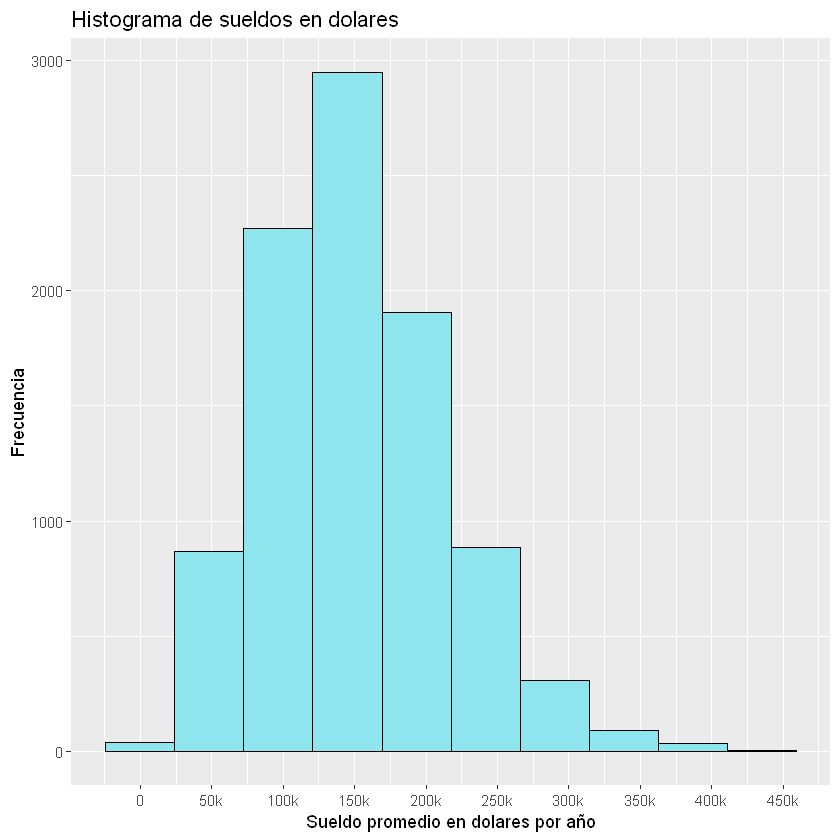

In [11]:
## histograma de sueldos en dolares

ggplot(df_salaries) + geom_histogram(aes(x = salary_in_usd),
                                     bins = 10, fill = "#8EE5EE", col ="black") +
  scale_x_continuous(breaks=c(0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000),
                     labels=c("0","50k","100k","150k","200k","250k","300k","350k","400k","450k","500k")) +
  labs(
    title = "Histograma de sueldos en dolares",
    x = "Sueldo promedio en dolares por año",
    y = "Frecuencia"
  )


En el análisis del grafico de frecuencia, el sueldo promedio anual en dólares, destaca que la mayoría de los empleados, representados por aproximadamente 3000 registros, perciben salarios cercanos a los 150,000 dólares, configurando la moda principal. Se observan, además, modas secundarias en los 100,000 y 200,000 dólares. No obstante, a medida que los salarios aumentan, la frecuencia de ocurrencia disminuye, indicando una distribución sesgada hacia salarios moderados y una proporción relativamente menor de ingresos elevados en la muestra estudiada.

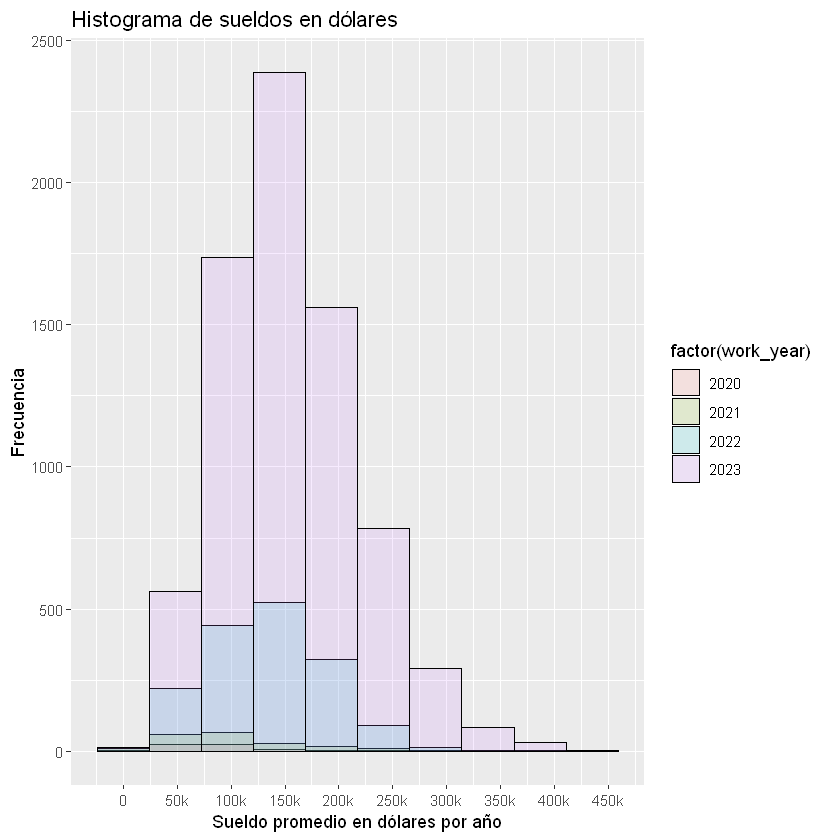

In [12]:
## histograma por año

ggplot(df_salaries) + 
  geom_histogram(aes(x = salary_in_usd, fill = factor(work_year)),
                 bins = 10, col = "black", alpha = 0.15, position = "identity") +
  scale_x_continuous(breaks = seq(0, 500000, by = 50000),
                     labels = c("0", "50k", "100k", "150k", "200k", "250k", "300k", "350k", "400k", "450k", "500k")) +
  labs(
    title = "Histograma de sueldos en dólares",
    x = "Sueldo promedio en dólares por año",
    y = "Frecuencia"
  )

Al desglosar el conjunto de datos por año, se evidencia una consistencia notable en la distribución del sueldo promedio. La mayoría de los datos se concentran en los años 2023 y 2022, sugiriendo una tendencia marcada hacia estos periodos. Intrigantemente, la moda salarial para ambos años sigue siendo de 150,000 dólares, destacando una estabilidad en la conducta salarial. En el año 2023, la moda se sitúa por debajo de los 2500 registros, mientras que para el año 2022, se mantiene ligeramente por encima de los 500 registros. Esta consistencia en la moda salarial a lo largo de estos dos años revela una pauta persistente en la compensación, a pesar de las variaciones en el número de registros. La falta de cambios significativos en la moda subraya una conducta salarial constante.

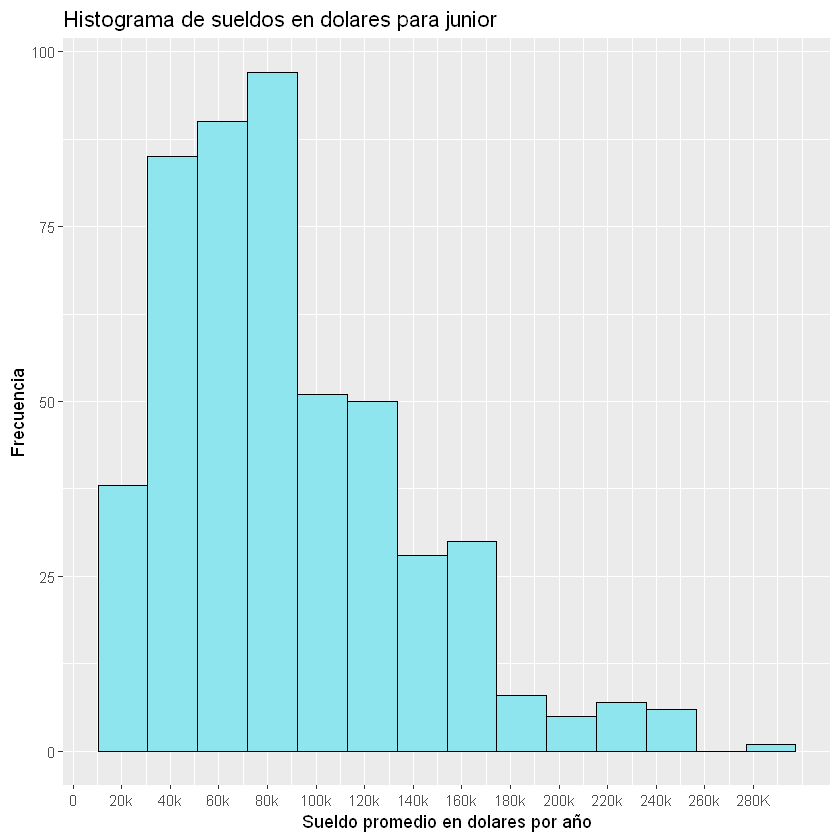

In [13]:
## histograma por nivel de experiencia junior

junior <- df_salaries %>% filter(experience_level == "Entry-level")
ggplot(junior) + geom_histogram(aes(x = salary_in_usd),
                                     bins = 14, fill = "#8EE5EE", col ="black") +
  scale_x_continuous(breaks=c(0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,240000,260000,280000),
                     labels=c("0","20k","40k","60k","80k","100k","120k","140k","160k","180k","200k","220k","240k","260k","280K")) +
  labs(
    title = "Histograma de sueldos en dolares para junior",
    x = "Sueldo promedio en dolares por año",
    y = "Frecuencia"
  )

En el análisis específico del histograma para el nivel de experiencia junior (Entry-level), se observa un cambio significativo en la moda salarial, que ahora se sitúa en 80,000 dólares, con aproximadamente 100 registros, seguido de modas adicionales a 60,000 y 40,000 dólares. A medida que los salarios disminuyen de 100,000 a 140,000 dólares, la frecuencia disminuye gradualmente, pero se registra un aumento notable al llegar a los 160,000 dólares, fenómeno que se repite en el rango de 220,000 dólares. Además, se identifican valores atípicos por encima de los 280,000 dólares, sugiriendo compensaciones excepcionalmente altas.

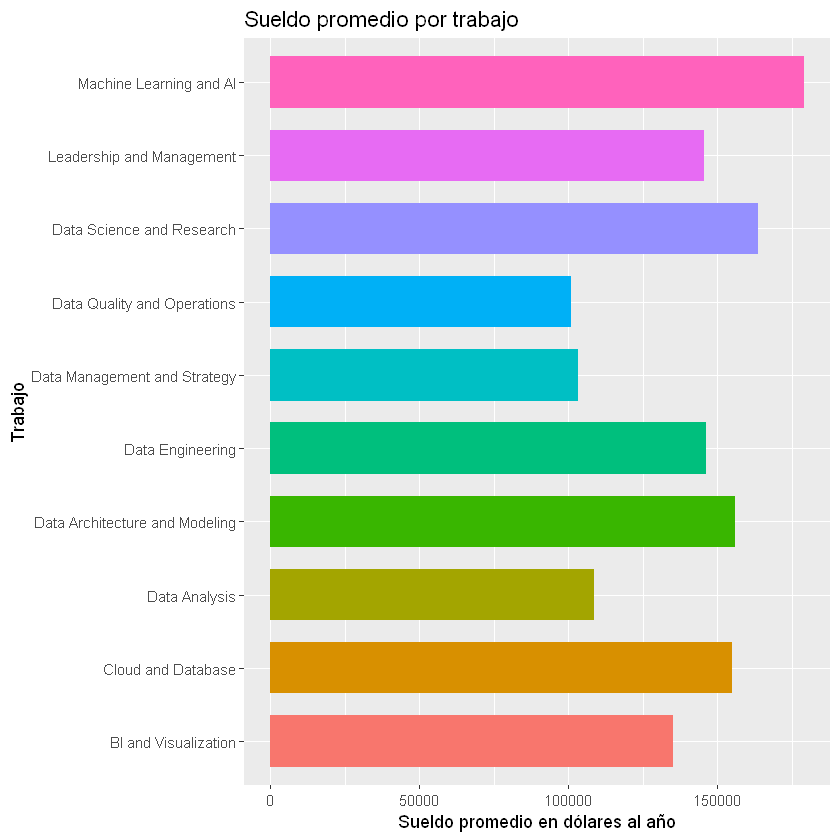

In [14]:
## barras por job_category
df_jobs_category <- df_salaries %>% 
  group_by(job_category) %>% 
  summarise(
    job_count = n(),  # Número de filas en cada grupo
    mean_salary = mean(salary_in_usd), # Media de salario en cada grupo
    sd_salary = sd(salary_in_usd), # Desviación estándar de salario en cada grupo
    percent_sd = (sd_salary / mean_salary) * 100 # Porcentaje de desviación estándar
  ) %>%
  ungroup() %>%  # Desagrupar para evitar el mensaje de advertencia
  replace_na(list(sd_salary = 0, percent_sd = 0)) %>%  # Reemplazar NA con 0
  mutate(percent_sd = round(percent_sd, 2)) %>%  # Redondear a 2 decimales)
  arrange(desc(mean_salary)) # Ordenar por salario medio de mayor a menor

ggplot(df_jobs_category) + 
  geom_bar(aes(x = job_category, y = mean_salary, fill = factor(job_category)),
           stat = "identity", width = 0.7) +
  coord_flip() +
  labs(
    title = "Sueldo promedio por trabajo",
    x = "Trabajo",
    y = "Sueldo promedio en dólares al año"
  ) + theme(legend.position = "none")


El análisis del gráfico de barras por categoría de trabajo resalta claramente las disparidades salariales entre las distintas funciones laborales. Se destaca que los salarios promedio anuales más altos se encuentran en la categoría de "Machine Learning and IA", superando los 170,000 dólares. En segundo lugar, la categoría de "Data Science and Research" muestra salarios ligeramente superiores a los 150,000 dólares. A continuación, las categorías de "Data Architecture and Modeling" y "Cloud and Database" siguen de cerca con niveles salariales comparables. En contraste, la categoría que presenta los salarios promedio anuales más bajos es "Data Quality and Operations", con un valor de 100,000 dólares.

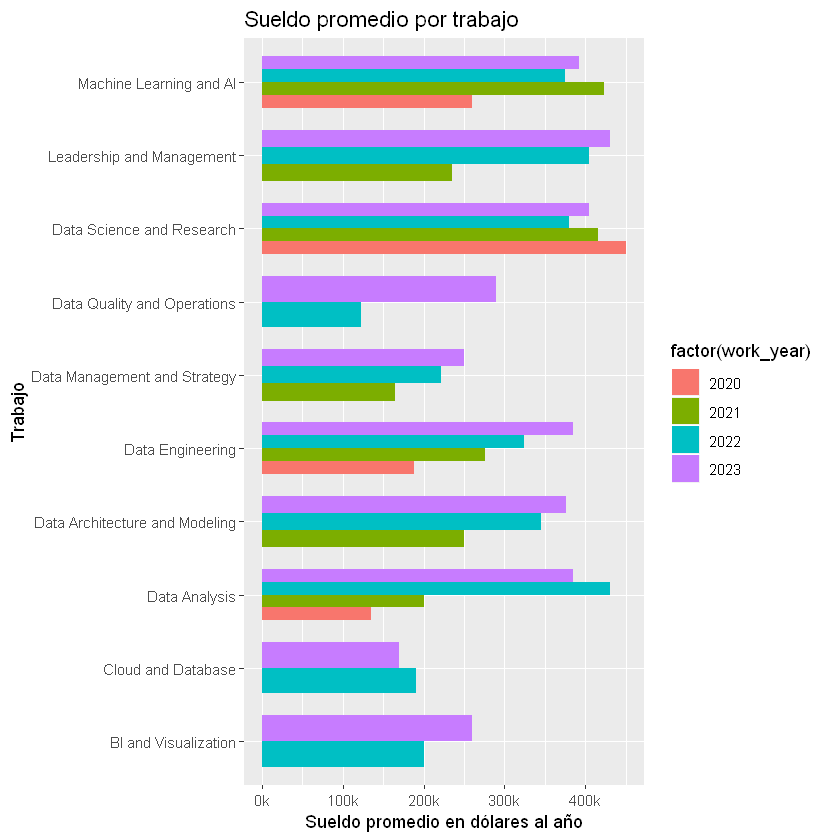

In [15]:
## grafico de barras por job_category para cada año

ggplot(df_salaries) + 
  geom_bar(aes(x = job_category, y = salary_in_usd, fill = factor(work_year)),
           stat = "identity", position = "dodge", width = 0.7) +
  coord_flip() +
  scale_y_continuous(labels = scales::number_format(scale = 1e-3, suffix = "k")) +
  labs(
    title = "Sueldo promedio por trabajo",
    x = "Trabajo",
    y = "Sueldo promedio en dólares al año"
  )


El análisis del gráfico de barras por categoría de trabajo y año revela una distribución interesante de los salarios, destacando la ausencia de datos para los años 2020 y 2021 en varias categorías. Por lo tanto, se focaliza en los años 2022 y 2023, donde se observa un aumento generalizado en los salarios a lo largo del tiempo, con excepciones notables en las categorías de "Cloud and Database" y "Data Analysis". Entre las tendencias más notorias, se destaca el significativo incremento en los salarios de la categoría "Data Quality and Operations", que casi duplica su compensación entre 2022 y 2023. Además, para el año 2023, la categoría mejor remunerada es "Leadership and Management", con salarios que superan los 400,000 dólares anuales. 

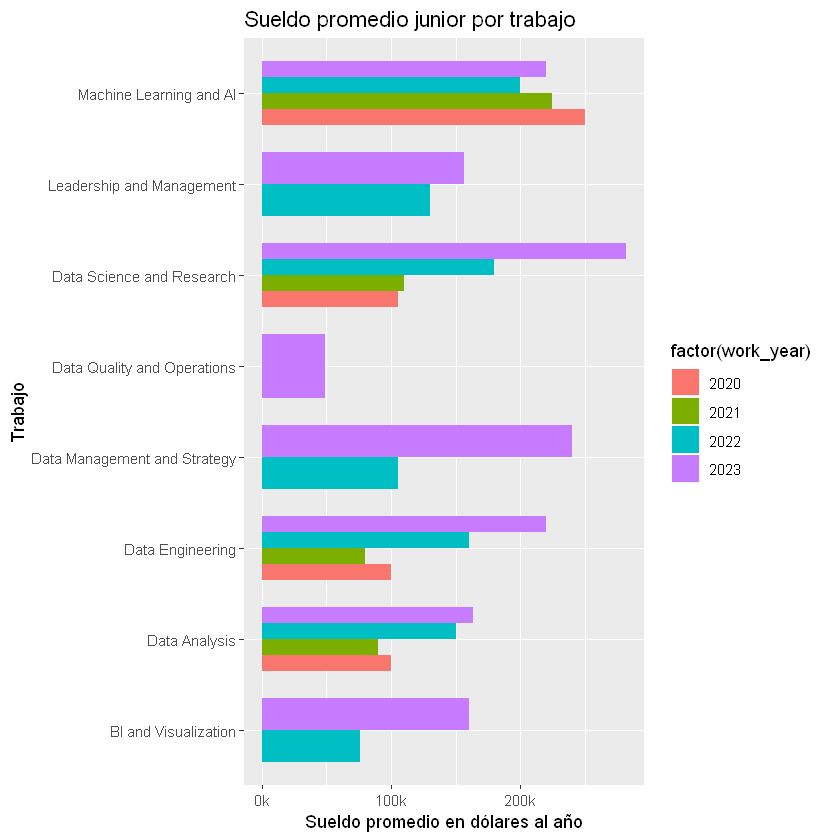

In [16]:
## grafico de barras por job_category para cada año para junior (entry-level)

ggplot(junior) + 
  geom_bar(aes(x = job_category, y = salary_in_usd, fill = factor(work_year)),
           stat = "identity", position = "dodge", width = 0.7) +
  coord_flip() +
  scale_y_continuous(labels = scales::number_format(scale = 1e-3, suffix = "k")) +
  labs(
    title = "Sueldo promedio junior por trabajo",
    x = "Trabajo",
    y = "Sueldo promedio en dólares al año"
)

Al realizar un análisis específico del gráfico anterior, enfocándonos en el nivel de experiencia junior y observando que la categoría "Data Quality and Operations" no cuenta con registros para el año 2022, se destacan tendencias notables. Entre ellas, la categoría "Data Management and Operations" experimenta el mayor aumento salarial, superando el doble de su compensación anterior entre 2022 y 2023. Además, se evidencia un crecimiento generalizado en todos los casos, destacando que la categoría "Data Science and Research" lidera en salarios promedio para el año 2023, superando los 250,000 dólares anuales. "Data Management and Operations" sigue de cerca como la segunda categoría mejor remunerada. Estos resultados sugieren que, incluso en el nivel de experiencia junior, hay dinámicas significativas en las tendencias salariales, con un énfasis particular en campos especializados como la gestión de datos y la investigación científica.

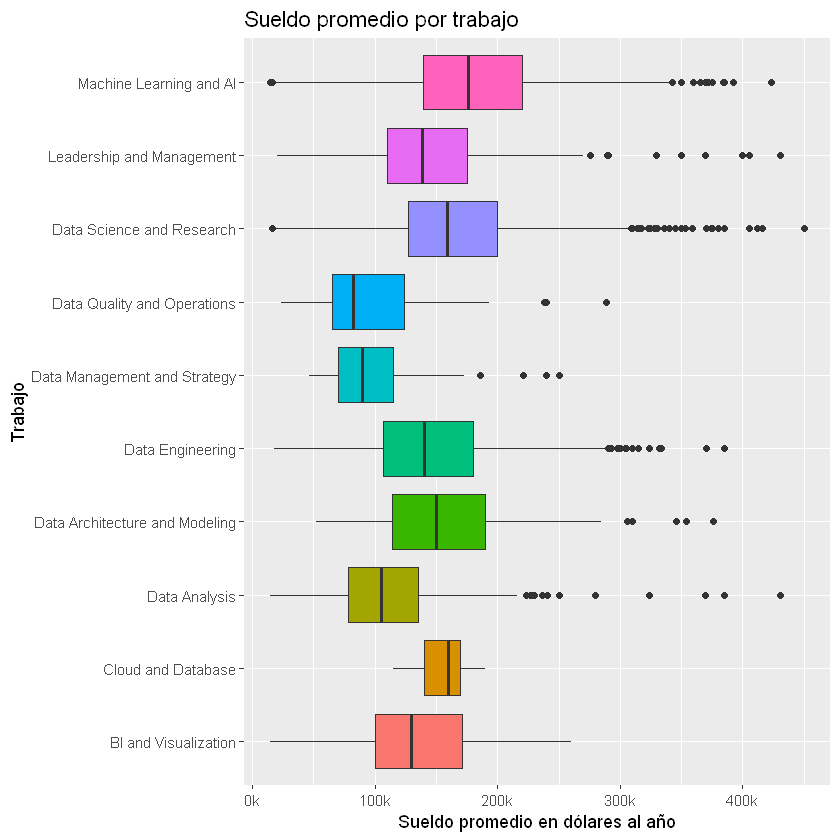

In [17]:
# grafico de cajas

ggplot(df_salaries) + 
  geom_boxplot(aes(x = job_category, y = salary_in_usd, fill = factor(job_category))) +
  coord_flip() +
  scale_y_continuous(labels = scales::number_format(scale = 1e-3, suffix = "k")) +
  labs(
    title = "Sueldo promedio por trabajo",
    x = "Trabajo",
    y = "Sueldo promedio en dólares al año"
  ) + theme(legend.position = "none")

El análisis mediante un gráfico de cajas para el sueldo promedio anual en dólares, segmentado por categoría, revela patrones significativos en la distribución salarial. Se identifican valores atípicos en la mayoría de las categorías, destacando excepciones en "Cloud and Database" y "BI and Visualization". La mediana más elevada se encuentra en "Machine Learning and AI", superando los 150,000 dólares, seguida de cerca por "Cloud and Database". En contraste, la categoría con la mediana más baja es "Data Quality and Operations", registrando menos de 100,000 dólares. En general, la mayoría de las medianas se sitúan entre 100,000 y 200,000 dólares, indicando una distribución concentrada en este rango salarial. Además, los valores atípicos, en su mayoría, superan el máximo sin considerar valores atípicos, sugiriendo la presencia de compensaciones excepcionales en diversas categorías. 

En el análisis del gráfico de cajas relacionado con los salarios en distintas categorías, se destaca que las áreas de machine learning and AI, leadership and management, data science and research, data quality and operations, data management and strategy, y data engineering exhiben una asimetría positiva. Esta observación sugiere que los salarios en estas áreas están más ampliamente distribuidos con respecto a la mediana, indicando la presencia de valores más altos que tiran la distribución hacia la derecha. Por otro lado, data architecture and modeling, así como data analysis, presentan una simetría en sus distribuciones salariales. Finalmente, la categoría cloud and database muestra una asimetría negativa, lo que implica que la distribución de los salarios está concentrada por debajo de la mediana, indicando la presencia de valores más bajos que afectan la distribución hacia la izquierda. Estas observaciones proporcionan insights valiosos sobre la variabilidad salarial en diferentes áreas relacionadas con datos.

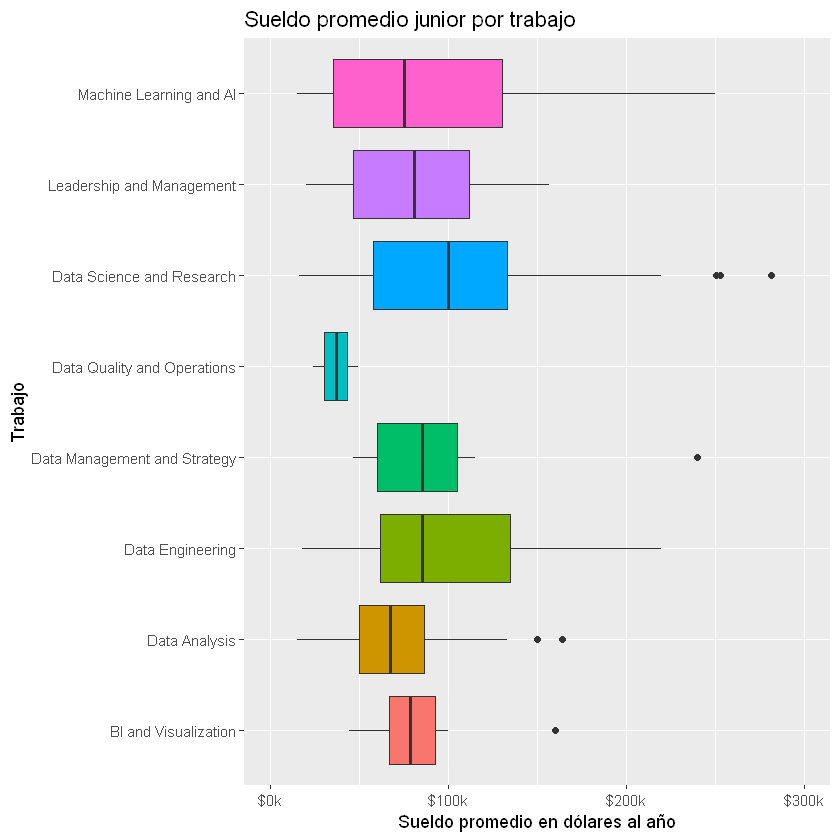

In [18]:
# grafico de cajas para junior

ggplot(junior) + 
  geom_boxplot(aes(x = job_category, y = salary_in_usd, fill = factor(job_category))) +
  coord_flip() +
  scale_y_continuous(labels = scales::dollar_format(scale = 1e-3, suffix = "k"), limits = c(0,300000)) +
  labs(
    title = "Sueldo promedio junior por trabajo",
    x = "Trabajo",
    y = "Sueldo promedio en dólares al año"
  ) + theme(legend.position = "none")

En el gráfico de cajas filtrando el nivel de experiencia a "junior" (Entry-level), se identifican valores atípicos positivos en varias categorías salariales. En particular, se destacan valores excepcionalmente altos en data science and research (+$250k), data management and strategy (cerca de $250k), data analysis (en el rango de $150k-$170k), y bi and visualizations (superior a $150k). Estos valores atípicos sugieren la presencia de salarios significativamente elevados dentro de estas áreas específicas para profesionales con nivel de entrada.

Asimismo, se observa una asimetría positiva en las categorías de machine learning and AI, data engineering, y en menor medida, bi and visualizations. Estos hallazgos indican que hay una distribución más amplia de salarios hacia valores más altos para los profesionales junior en estas áreas.

Por otro lado, se evidencia una asimetría negativa en las categorías de leadership and management, data science and research, y data management and strategy, sugiriendo que la concentración de salarios para profesionales junior tiende a estar por debajo de la mediana en estas áreas.

Las categorías que presentan simetría en sus distribuciones son data quality and operations, destacando que la dispersión de salarios es baja debido a la agrupación en valores similares, y data analysis. Estos resultados ofrecen una visión detallada de la variabilidad salarial y la presencia de valores atípicos en el nivel de entrada para diferentes categorías relacionadas con datos.